## Day1 このセッションの目的
- お店のアンケート結果からCS分析を行い、改善点を見つけよう！
- 統計学アプローチで分析する

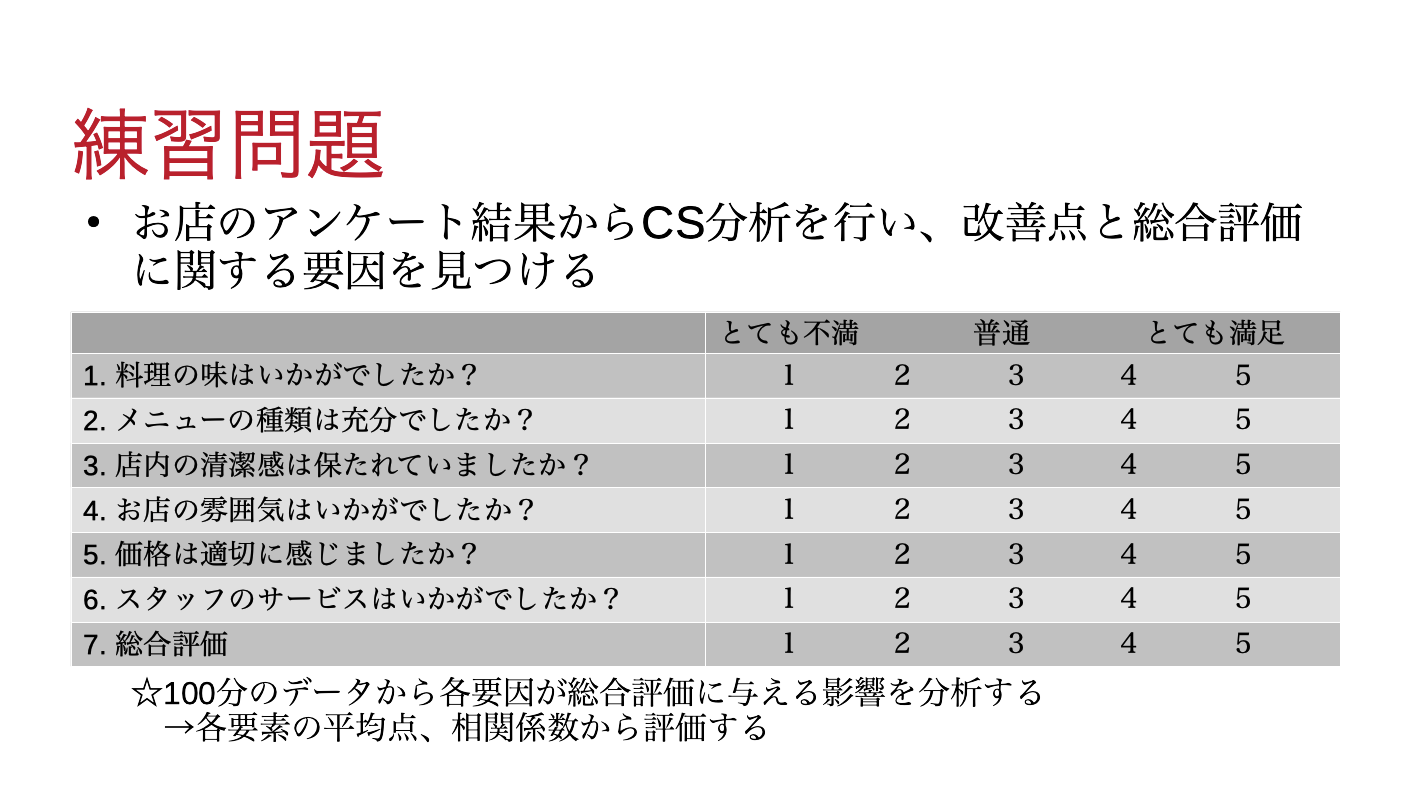

In [1]:
from IPython.display import Image
Image("Practice-1.png")

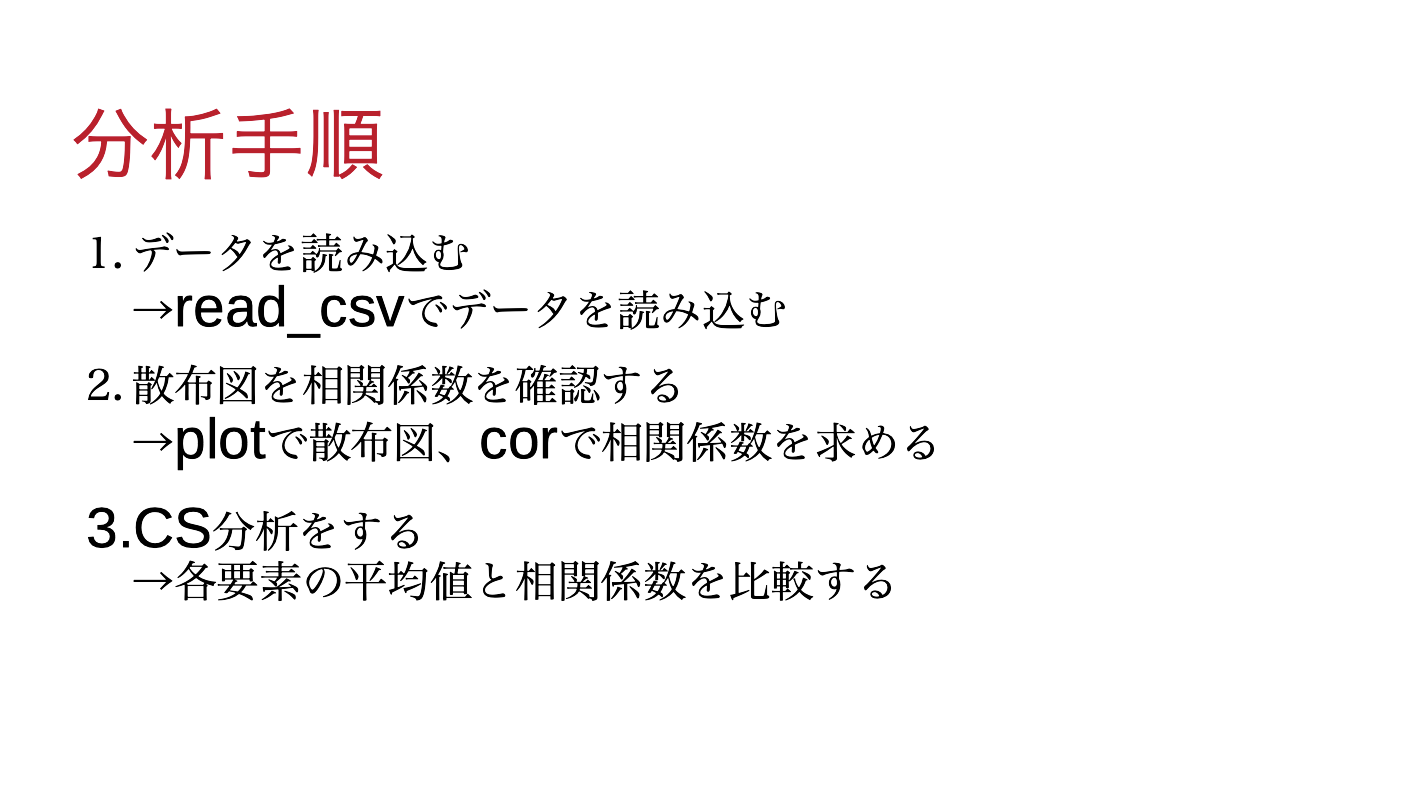

In [2]:
Image("Practice-2.png")

In [3]:
# データ解析用ライブラリを読み込む
import pandas as pd

In [4]:
# csvファイルを読み込む
# ファイルの文字コードの違いを理解する
#df1 = pd.read_csv("data03-mac.csv")
df1 = pd.read_csv("data03-mac.csv", encoding="utf-8", sep=",", header=0)
# 先頭を表示
df1.head()

,設問1,設問2,設問3,設問4,設問5,設問6,総合評価
0,4,4,1,3,5,1,4
1,3,4,5,1,4,2,3
2,5,2,5,1,5,2,5
3,5,2,3,3,4,2,5
4,5,1,5,1,4,2,5


In [5]:
#df1 = pd.read_csv("data03-win.csv")
df1 = pd.read_csv("data03-win.csv", encoding="SHIFT-JIS", sep=",", header=0)
df1.head()

,設問1,設問2,設問3,設問4,設問5,設問6,総合評価
0,4,4,1,3,5,1,4
1,3,4,5,1,4,2,3
2,5,2,5,1,5,2,5
3,5,2,3,3,4,2,5
4,5,1,5,1,4,2,5


In [6]:
# 末尾を表示 終わりから10だけ表示する
df1.tail(10)

,設問1,設問2,設問3,設問4,設問5,設問6,総合評価
90,4,3,2,4,4,2,3
91,5,5,5,2,4,3,5
92,2,2,5,1,3,1,3
93,5,1,5,1,5,2,5
94,5,4,5,1,5,2,5
95,5,1,4,5,4,2,5
96,5,3,5,2,4,2,4
97,2,1,2,1,2,1,1
98,4,1,4,1,5,2,4
99,5,1,5,1,5,3,5


In [7]:
# データの行列を確認する
df1.shape
# 100個のデータ（レコード）があり、7個のパラメータを持っていることがわかる

(100, 7)

In [8]:
# 基本統計量を確認する
df1.describe()

,設問1,設問2,設問3,設問4,設問5,設問6,総合評価
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,4.330000,2.360000,4.060000,2.310000,3.990000,2.150000,4.07000
std,0.921735,1.314411,1.285663,1.606144,0.784895,0.914253,0.95616
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.00000
25%,4.000000,1.000000,3.750000,1.000000,4.000000,1.750000,4.00000
50%,5.000000,2.000000,5.000000,1.000000,4.000000,2.000000,4.00000
75%,5.000000,3.000000,5.000000,3.250000,5.000000,3.000000,5.00000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000


In [9]:
# 描画用のライブラリを読み込む
import matplotlib.pyplot as plt
import seaborn as sns #ヒートマップ作成用
%matplotlib inline

<function matplotlib.pyplot.show(*args, **kw)>

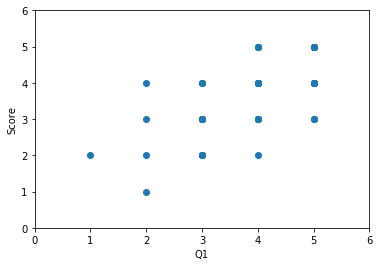

In [10]:
# 散布図でデータの分布を確認する
plt.scatter(df1["設問1"], df1["総合評価"])
plt.xlim([0, 6])
plt.ylim([0, 6])
plt.xlabel("Q1")
plt.ylabel("Score")
plt.show

In [11]:
# 上図ではデータが重なり合っているので、度数（条件の数）がわからない
# クロス集計を用いて個数を確認する
pd.crosstab(df1["設問1"], df1["総合評価"])

総合評価,1,2,3,4,5
設問1,,,,,
1,0,1,0,0,0
2,1,1,1,1,0
3,0,4,6,3,0
4,0,1,5,15,4
5,0,0,3,19,35


In [12]:
# 平均を求める
df1_means = df1.mean()
df1_means

設問1     4.33
設問2     2.36
設問3     4.06
設問4     2.31
設問5     3.99
設問6     2.15
総合評価    4.07
dtype: float64

## ポイント
### ・平均の低い設問2, 4, 6を改善すれば総合評価がもっと高くなるのではないか？
### ・平均だけ見ているとミスリードを起こしやすい
### ・総合評価に影響が高い設問は何かを探す

In [13]:
# 各設問と総合評価の相関係数を求める
df1_corr = df1.corr()
#print(df1_corr)
df1_corr

,設問1,設問2,設問3,設問4,設問5,設問6,総合評価
設問1,1.000000,0.134398,0.119503,0.018900,0.409505,0.432113,0.707038
設問2,0.134398,1.000000,0.100658,-0.024689,0.267879,0.189966,0.253010
設問3,0.119503,0.100658,1.000000,-0.258571,0.150748,0.103982,0.160887
設問4,0.018900,-0.024689,-0.258571,1.000000,-0.221866,-0.135169,-0.073469
設問5,0.409505,0.267879,0.150748,-0.221866,1.000000,0.452551,0.633529
設問6,0.432113,0.189966,0.103982,-0.135169,0.452551,1.000000,0.623389
総合評価,0.707038,0.253010,0.160887,-0.073469,0.633529,0.623389,1.000000


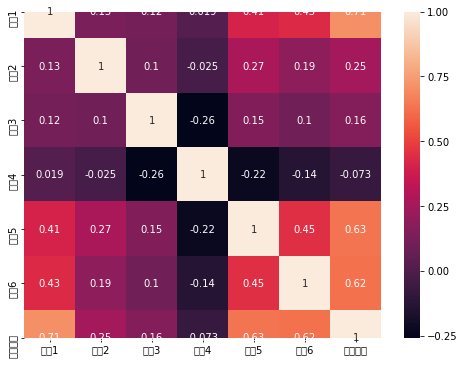

In [15]:
# ヒートマップで相関関係を可視化
plt.figure(figsize=(8, 6))
sns.heatmap(df1_corr, annot=True)

In [16]:
# df1から総合評価の列以外を抽出し、転置する
x = df1_corr.iloc[6:, :-1]
x = x.transpose()
print(x)
print("--------------------------")
x.shape

         総合評価
設問1  0.707038
設問2  0.253010
設問3  0.160887
設問4 -0.073469
設問5  0.633529
設問6  0.623389
--------------------------


(6, 1)

In [17]:
# df1から総合評価を抽出する
y = df1_means[0:6]
print(y)
print("-------------------------")
y.shape

設問1    4.33
設問2    2.36
設問3    4.06
設問4    2.31
設問5    3.99
設問6    2.15
dtype: float64
-------------------------


(6,)

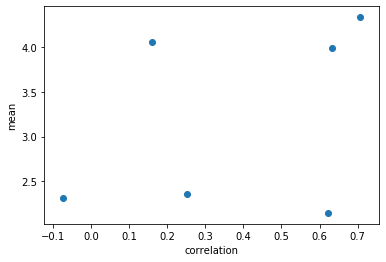

In [18]:
# 横軸に相関係数、縦軸に平均をとってグラフ化する
plt.scatter(x.values, y.values)
plt.xlabel("correlation")
plt.ylabel("mean")
plt.show()
# どの点が設問にあたるのか分かりづらい

### グラフの各点に設問Noを表示させる

In [19]:
# xとyを行で結合させる
df = pd.concat([x, y], axis=1)
df = df.rename(columns={'総合評価':'相関係数', 0:'平均'}) #列名変更
df

,相関係数,平均
設問1,0.707038,4.33
設問2,0.253010,2.36
設問3,0.160887,4.06
設問4,-0.073469,2.31
設問5,0.633529,3.99
設問6,0.623389,2.15


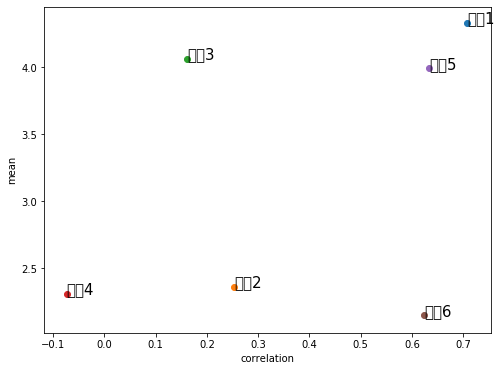

In [20]:
# 横軸に相関係数、縦軸に平均をとってグラフ化する
# 各点にindexを表示させる
plt.figure(figsize=(8, 6))
for k, v in df.iterrows():
    plt.scatter(v[0], v[1])
    plt.annotate(k, xy=(v[0], v[1]), size=15)
plt.xlabel("correlation")
plt.ylabel("mean")
plt.show()
# 文字化けしている理由は、jupter notebookのグラフ表示を日本語に設定していないため

### 上図結果から考察してみよう
- 右上付近のデータは、設問が総合評価に大きく影響するので、維持することが重要
- 右下付近のデータは、総合評価に影響する設問なので改善が必要
- 左上付近のデータは、総合評価の平均点は高いが総合評価に影響は低いので、できれば改善すべき
- 左下付近のデータは、総合評価に影響しない設問なので無視してよい。別に総合評価に影響する設問を考えたほうが良い

# END

### 参考　その１
#### 上図を描くために、各変数にどんな値が入っているかを確認している

In [34]:
df.index.values

array(['設問1', '設問2', '設問3', '設問4', '設問5', '設問6'], dtype=object)

In [35]:
df[["相関係数"]].values

array([[ 0.70703786],
       [ 0.25300995],
       [ 0.16088652],
       [-0.0734688 ],
       [ 0.63352915],
       [ 0.62338904]])

In [36]:
df[["平均"]].values

array([[4.33],
       [2.36],
       [4.06],
       [2.31],
       [3.99],
       [2.15]])

In [42]:
# 参考
# 上図を書くために各値がどうなっているかを確認している
#１行づつ抽出し、kとvの値を確認している
for k, v in df.iterrows():
    print(k)
    print("------------------------")
    print(v)
    print("------------------------")
    print(v[0])
    print("------------------------")
    print(v[1])
    print("------------------------")

設問1
------------------------
相関係数    0.707038
平均      4.330000
Name: 設問1, dtype: float64
------------------------
0.7070378625608882
------------------------
4.33
------------------------
設問2
------------------------
相関係数    0.25301
平均      2.36000
Name: 設問2, dtype: float64
------------------------
0.2530099479647874
------------------------
2.36
------------------------
設問3
------------------------
相関係数    0.160887
平均      4.060000
Name: 設問3, dtype: float64
------------------------
0.16088652432627426
------------------------
4.06
------------------------
設問4
------------------------
相関係数   -0.073469
平均      2.310000
Name: 設問4, dtype: float64
------------------------
-0.0734688000411493
------------------------
2.31
------------------------
設問5
------------------------
相関係数    0.633529
平均      3.990000
Name: 設問5, dtype: float64
------------------------
0.6335291451928478
------------------------
3.99
------------------------
設問6
------------------------
相関係数    0.623389
平均      2.1500

### 参考　その２
### 注意！　セルを実行すると結果がかわるので、これ以降はセルを実行しないでください

In [11]:
# pandasをインポートしようとしたらエラーとなった。原因不明。
# とりあえずpandasを最新にしてみる
import pandas as pd

AttributeError: module 'pandas' has no attribute 'compat'

In [9]:
!conda -V
print("-----------------------------")
!python -V
print("-----------------------------")
!pip list

conda 4.7.11
-----------------------------
Python 3.6.8 :: Anaconda custom (64-bit)
-----------------------------
Package                            Version  
---------------------------------- ---------
absl-py                            0.7.1    
alabaster                          0.7.10   
anaconda-client                    1.6.14   
anaconda-navigator                 1.9.7    
anaconda-project                   0.8.2    
appnope                            0.1.0    
appscript                          1.0.1    
asn1crypto                         0.24.0   
astor                              0.8.0    
astroid                            1.6.1    
astropy                            2.0.3    
attrs                              17.4.0   
Babel                              2.5.3    
backports.shutil-get-terminal-size 1.0.0    
beautifulsoup4                     4.6.0    
bitarray                           0.8.1    
bkcharts                           0.2      
blaze                          

You should consider upgrading via the 'pip install --upgrade pip' command.


In [13]:
!pip install -U pandas

     |████████████████████████████████| 10.2MB 2.1MB/s eta 0:00:01
  Found existing installation: pandas 0.22.0
    Uninstalling pandas-0.22.0:
      Successfully uninstalled pandas-0.22.0
You should consider upgrading via the 'pip install --upgrade pip' command.


In [15]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 894kB/s eta 0:00:01
  Found existing installation: pip 19.1.1
    Uninstalling pip-19.1.1:
      Successfully uninstalled pip-19.1.1


In [29]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 14.4MB 2.2MB/s eta 0:00:01
  Found existing installation: matplotlib 3.0.0
    Uninstalling matplotlib-3.0.0:
      Successfully uninstalled matplotlib-3.0.0
